<a href="https://colab.research.google.com/github/Fandi02/Klasifikasi-Gambar-Machine-Learning/blob/master/Proyek_Akhir_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [25]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-07-18 13:06:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.25MB/s    in 48s     

2021-07-18 13:07:48 (6.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [26]:
#Mengekstrak file
!pip install split-folders
import splitfolders
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/images", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:02, 735.22 files/s]


In [27]:
os.listdir('/tmp/images/train')

['paper', 'scissors', 'rock']

In [28]:
os.listdir('/tmp/images/val')

['paper', 'scissors', 'rock']

In [29]:
#membuat direktori kertas pada direktor data training
train_paper_dir = os.path.join(train_dir, 'paper')

#membuat direktori batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

#membuat direktori gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

#membuat direktori kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

#membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

#membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,              
                shear_range = 0.2,
                fill_mode = 'nearest')

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data lath
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=5,   
    class_mode='categorical',)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=5,
    class_mode='categorical',)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [34]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=33,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=12, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/12
33/33 - 12s - loss: 1.1064 - accuracy: 0.4182 - val_loss: 1.1217 - val_accuracy: 0.3200
Epoch 2/12
33/33 - 11s - loss: 1.0961 - accuracy: 0.3455 - val_loss: 1.0536 - val_accuracy: 0.5600
Epoch 3/12
33/33 - 11s - loss: 0.9436 - accuracy: 0.5576 - val_loss: 0.9220 - val_accuracy: 0.5520
Epoch 4/12
33/33 - 11s - loss: 0.7170 - accuracy: 0.7515 - val_loss: 0.6606 - val_accuracy: 0.7520
Epoch 5/12
33/33 - 11s - loss: 0.5697 - accuracy: 0.7939 - val_loss: 0.4733 - val_accuracy: 0.8320
Epoch 6/12
33/33 - 11s - loss: 0.5214 - accuracy: 0.8182 - val_loss: 0.4044 - val_accuracy: 0.8560
Epoch 7/12
33/33 - 11s - loss: 0.4181 - accuracy: 0.8424 - val_loss: 0.5027 - val_accuracy: 0.8240
Epoch 8/12
33/33 - 11s - loss: 0.4840 - accuracy: 0.8182 - val_loss: 0.3379 - val_accuracy: 0.9040
Epoch 9/12
33/33 - 11s - loss: 0.2504 - accuracy: 0.9091 - val_loss: 0.3028 - val_accuracy: 0.9120
Epoch 10/12
33/33 - 11s - loss: 0.3229 - accuracy: 0.8909 - val_loss: 0.4295 - val_accuracy: 0.8480
Epoch 11/

In [36]:
model.evaluate(validation_generator)

176/176 [==============================] - 16s 93ms/step - loss: 0.2557 - accuracy: 0.9110


[0.25565335154533386, 0.9109588861465454]

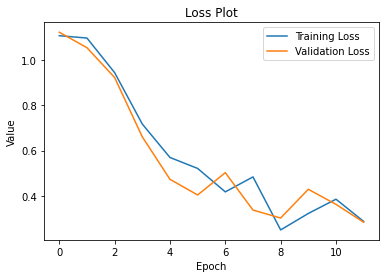

In [37]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

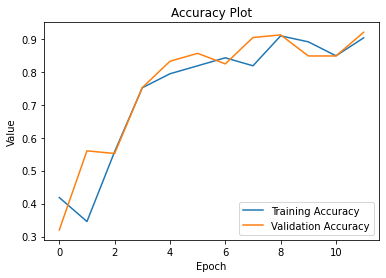

In [38]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving depositphotos_201891706-stock-video-playing-rock-paper-scissors-close.jpg to depositphotos_201891706-stock-video-playing-rock-paper-scissors-close (1).jpg
depositphotos_201891706-stock-video-playing-rock-paper-scissors-close.jpg
paper


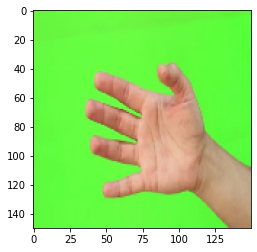

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_classes = np.argmax(classes)
  print(fn)
  #if classes[0][0]==1:
  #if classes[0,0]!=0:
  if output_classes == 0:
    print('paper')
  #elif classes[0][1]==1:
  #elif classes[0,1]!=0:
  elif output_classes == 1: 
    print('rock')
  #elif classes[0][2]==1:
  #elif classes[0,2]!=0:
  elif output_classes == 2:
    print('scissors')